## World Health Organization(WHO) has estimated 12 million deaths occur worldwide.

    Every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 


## Heart Disease Is World's No. 1 Killer
    All over the world ,in all ages, there is a lot of people catch heart diseases without noticing. It is only been detected at a late stage.

    Heart disease cases nearly doubled over the period from 271 million in 1990 to 523 million in 2019, and the number of heart disease deaths rose from 12.1 million to 18.6 million
**`How can we reduce the Heart diseases death rate?`**


    The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.
    I Aim to deploy a machine learning model that can predict whether the person may have a heart disease or not.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

###  EDA


In [2]:
df = pd.read_csv('heart.csv',sep=',',encoding="utf-8")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



_____________________
**`sex : 1 = Male , 0=Female`**

_____________________
**`cp : Chest Pain`**

    Angina: Angina is caused when there is not enough oxygen-rich blood flowing to a certain part of the heart. The arteries of the heart become narrow due to fatty deposits in the artery walls. The narrowing of arteries means that blood supply to the heart is reduced, causing angina.
    Value 1: typical angina || Value 2: atypical angina || Value 3: non-anginal pain || 4: asymptomatic
    

_____________________
**`threstbps :Resting blood pressure`**

    ( Normal pressure with no exercise )
 
 
_____________________
**`chol: serum cholestoral in mg/dl`**

    Cholesterol means the blockage for blood supply in the blood vessels


_____________________
**`fbs: fasting blood sugar > 120 mg/dl`**

    (1 = true; 0 = false) blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.
    
    
_____________________
**`restecg: resting electrocardiographic results (values 0,1,2)`**

     ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening
         
_____________________
**`thalach: maximum heart rate achieved`**
          
_____________________
**`exang: exercise induced angina`**

    (1 = yes; 0 = no) is chest pain while exercising or doing any physical activity.

_____________________
**`oldpeak = ST depression induced by exercise relative to rest`**

    ST Depression is the difference between value of ECG at rest and after exercise.
    An electrocardiogram records the electrical signals in your heart. It's a common and painless test used to quickly detect heart problems and monitor your heart's health. Electrocardiograms — also called ECGs or EKGs — are often done in a doctor's office, a clinic or a hospital room. ECG machines are standard equipment in operating rooms and ambulances. Some personal devices, such as smart watches, 
     
_____________________
**`slope:	the slope of the peak exercise ST segment`**
   
    Value 1: upsloping — Value 2: flat — Value 3: downsloping
 
_____________________
**`ca:	number of major vessels (0-3) colored by flourosopy`**

    Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object. In its primary application of medical imaging, a fluoroscope (/ˈflʊərəskoʊp/) allows a physician to see the internal structure and function of a patient, so that the pumping action of the heart or the motion of swallowing, for example, can be watched

_____________________
**`thal:The Types of thalassemia`**
 
    (3 = normal; 6 = fixed defect; 7 = reversable defect)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.shape

(303, 14)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.apply(lambda x:len(x.unique()))


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
print('cp ',df['cp'].unique())
print('fbs ',df['fbs'].unique())
print('restecg ',df['restecg'].unique())
print('exang ',df['exang'].unique())
print('slope ',df['slope'].unique())
print('ca ',df['ca'].unique())
print('thal ',df['thal'].unique())


cp  [3 2 1 0]
fbs  [1 0]
restecg  [0 1 2]
exang  [0 1]
slope  [0 2 1]
ca  [0 2 1 3 4]
thal  [1 2 3 0]


(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

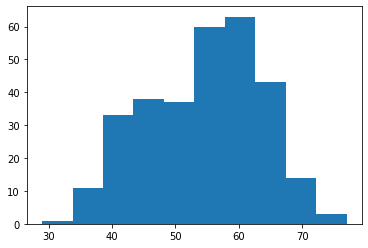

In [9]:
plt.hist(df['age'], bins=None, range=None, density=False)

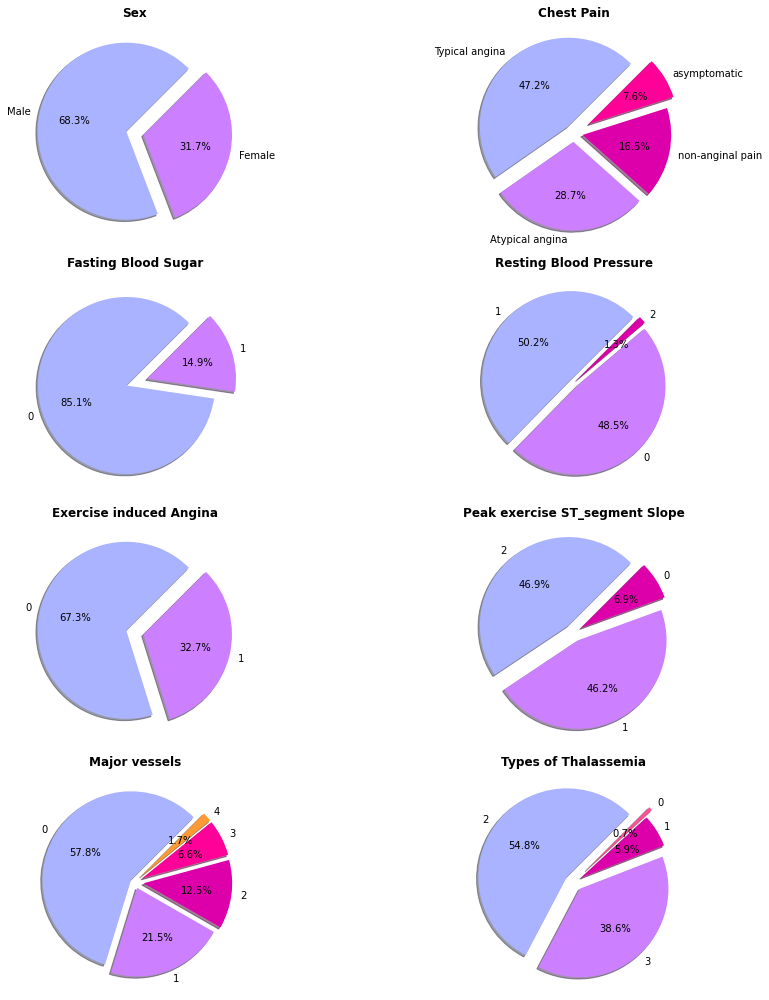

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ["Male", "Female"]
values = df['sex'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax1.set_title("Sex", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Typical angina", "Atypical angina","non-anginal pain","asymptomatic"]
values = df['cp'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099'],shadow=True,startangle=45,explode=[0.1, 0.1, 0.1, 0.2])
ax2.set_title("Chest Pain", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['fbs'].value_counts().index.tolist()[:2]
values = df['fbs'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Fasting Blood Sugar", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['restecg'].value_counts().index.tolist()[:3]
values = df['restecg'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[ 0.05, 0.05, 0.05])
ax4.set_title("Resting Blood Pressure", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['exang'].value_counts().index.tolist()[:2]
values = df['exang'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax5.set_title("Exercise induced Angina", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['slope'].value_counts().index.tolist()[:3]
values = df['slope'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[  0.1, 0.1, 0.1])
ax6.set_title("Peak exercise ST_segment Slope", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['ca'].value_counts().index.tolist()[:5]
values = df['ca'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1,0.1],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099','#FF9933'])
ax7.set_title("Major vessels", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['thal'].value_counts().index.tolist()[:4]
values = df['thal'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.2],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF5099'])
ax8.set_title("Types of Thalassemia", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

plt.savefig("PiePlots.png")

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

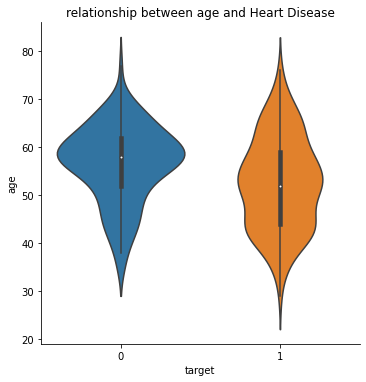

In [12]:
sns.catplot('target','age',data=df,kind='violin')
plt.title('relationship between age and Heart Disease')
plt.savefig("age.png")

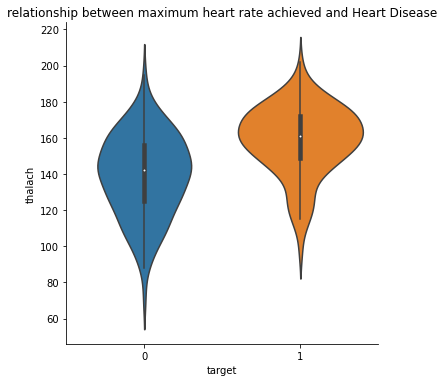

In [13]:
sns.catplot('target','thalach',data=df,kind='violin')
plt.title('relationship between maximum heart rate achieved and Heart Disease')
plt.savefig("thalach.png")

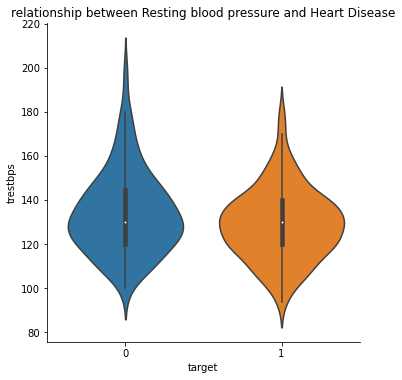

In [14]:
sns.catplot('target','trestbps',data=df,kind='violin')
plt.title('relationship between Resting blood pressure and Heart Disease')
plt.savefig("trestbps.png")

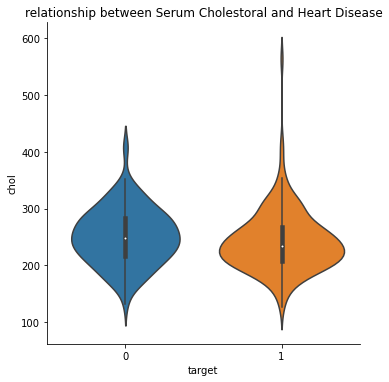

In [15]:
sns.catplot('target','chol',data=df,kind='violin')
plt.title('relationship between Serum Cholestoral and Heart Disease')
plt.savefig("chol.png")

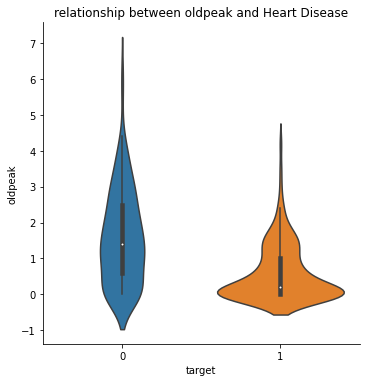

In [16]:
sns.catplot('target','oldpeak',data=df,kind='violin')
plt.title('relationship between oldpeak and Heart Disease')
plt.savefig("oldpeak.png")

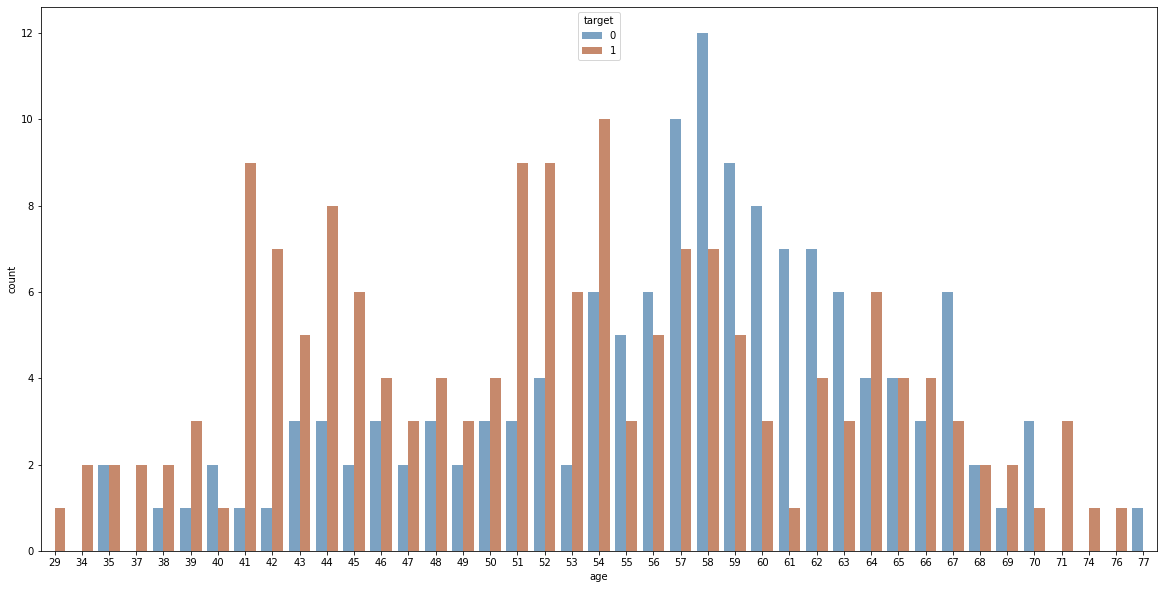

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['age'],data=df,hue='target',palette="twilight_shifted",saturation=2,dodge=True,)

plt.savefig("Target&age.png")

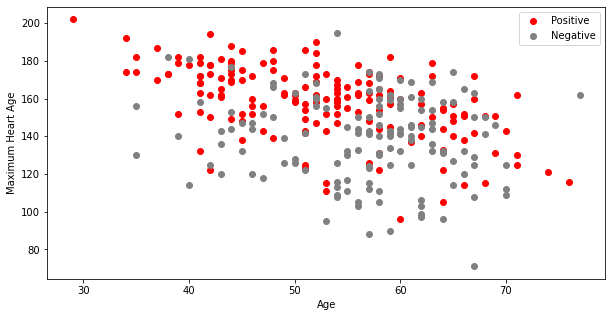

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],c='gray')
plt.legend(['Positive', 'Negative'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Age')
plt.show()

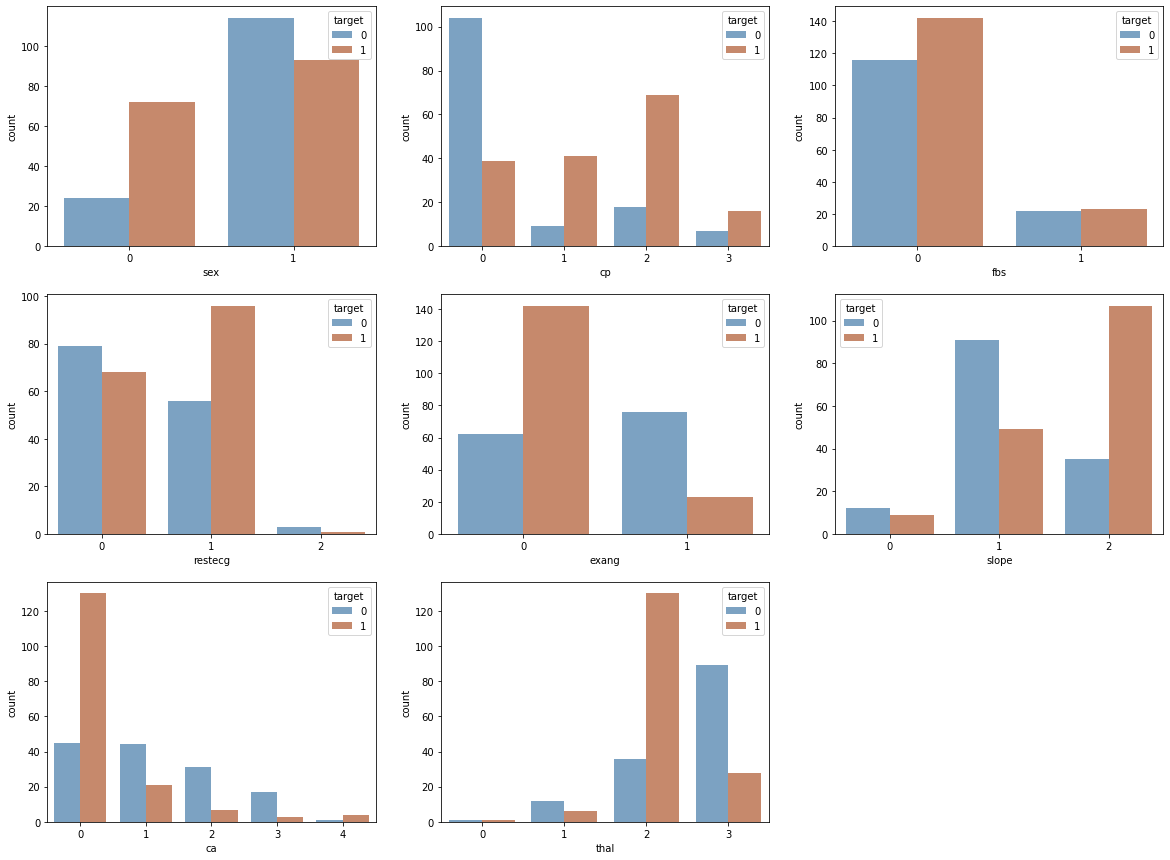

In [19]:
list = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
m=1
plt.figure(figsize=(20,15))
for i in list:
    plt.subplot(3,3,m)
    sns.countplot(x=i,data=df,hue='target',palette="twilight_shifted",
    saturation=2,dodge=True)
    m+=1
    
plt.savefig("TargetRelation.png")

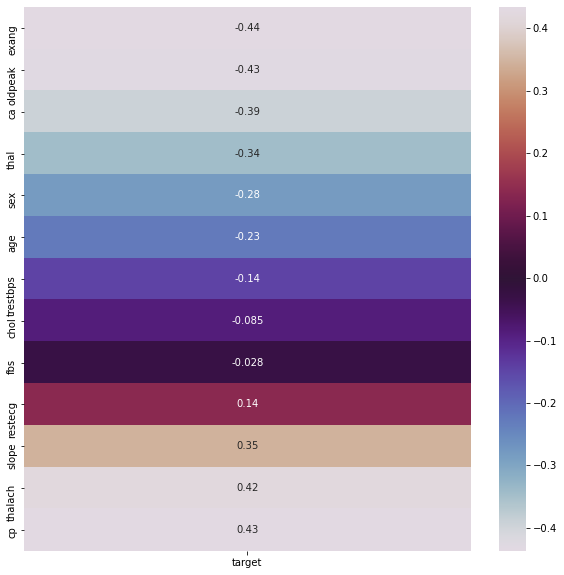

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(df.corr()['target']).sort_values(by='target').transpose().drop('target',axis=1).transpose(),annot=True,cmap='twilight')
plt.savefig("TargetCorrelations.png")

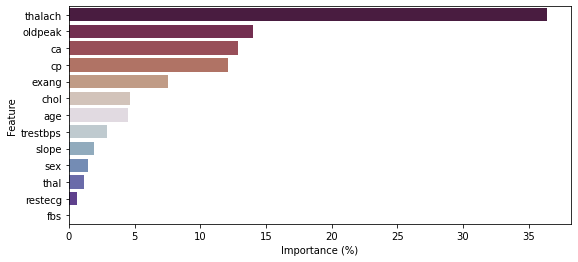

In [21]:
X = df.drop('target',axis=1)
Y = df['target']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.savefig("FeatureImportance.png")

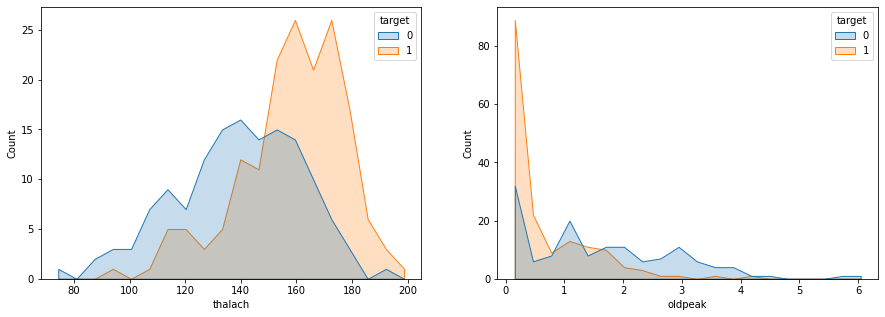

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df,hue='target',x='thalach',bins=20,element='poly')
plt.subplot(1,2,2)
sns.histplot(data=df,hue='target',x='oldpeak',bins=20,element='poly')
plt.savefig("Thalach&oldpeak_Histplot.png")

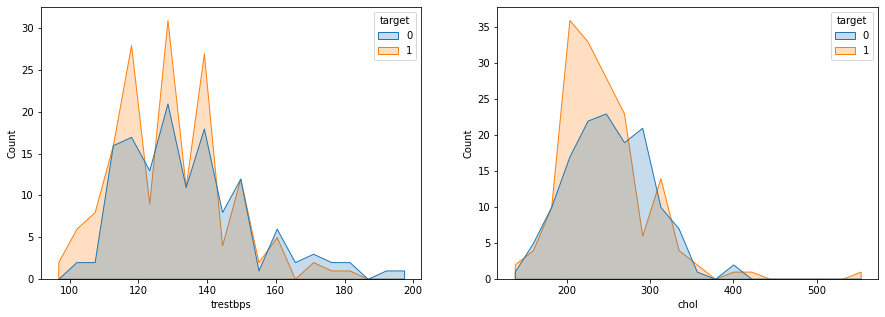

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df,hue='target',x='trestbps',bins=20,element='poly')
plt.subplot(1,2,2)
sns.histplot(data=df,hue='target',x='chol',bins=20,element='poly')
plt.savefig("Resting_blood_pressure&chol_Histplot.png")

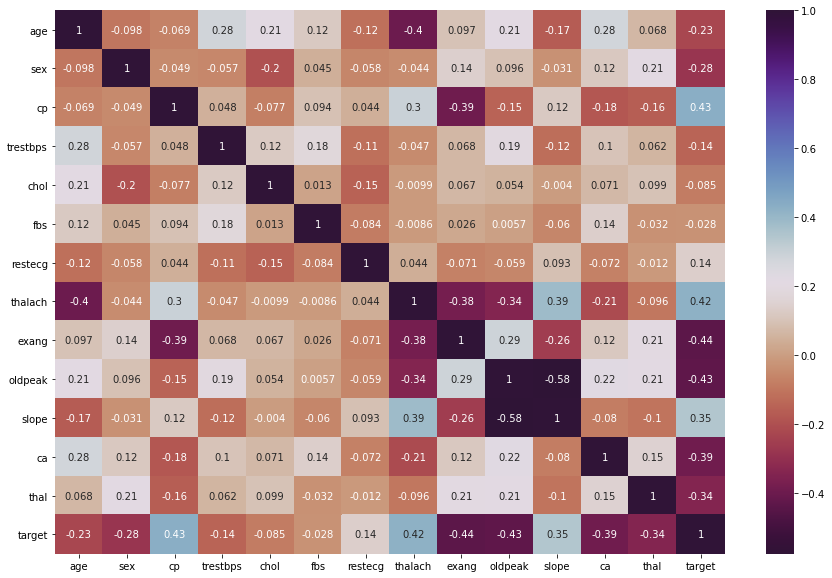

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cbar = True, annot =True,cmap='twilight_shifted_r');
plt.savefig("heatmap.png")

In [25]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


___________________________________

# Modelling
___________________________

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression

In [29]:
X = df.drop('target',axis=1).values
Y = df['target'].values

In [30]:
X.shape

(303, 13)

In [31]:
Y.shape

(303,)

In [32]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


------------------------
**` 1-LogisticRegression`**
----------------------

In [34]:
# Train and predict.
LL = LogisticRegression(solver='liblinear',max_iter = 1000, random_state = 31)
LL.fit(X_train,Y_train)
Y_pred_lr = LL.predict(X_test) 
y_pred_lr = np.around(Y_pred_lr)

In [35]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
score_lr

85.25

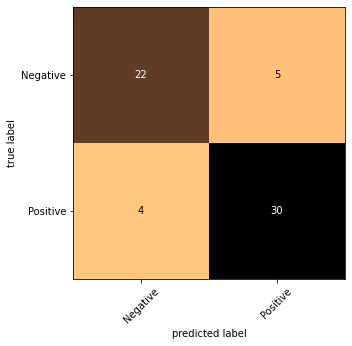

In [36]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_lr)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("LRcrr.png")

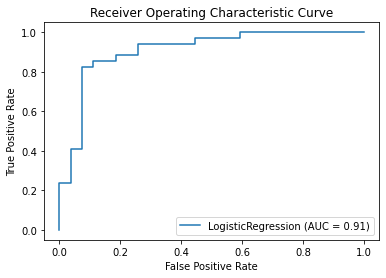

In [37]:
plot_roc_curve(LL,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("LR.png")

In [38]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



------------------------
**`-2-  - KNN CLF`**
----------------------

In [39]:
kclf = KNeighborsClassifier(n_neighbors=31,leaf_size=30)
kclf.fit(X_train,Y_train)
Y_pred_kclf = kclf.predict(X_test)
score_kclf = round(accuracy_score(Y_pred_kclf,Y_test)*100,2)
score_kclf

68.85

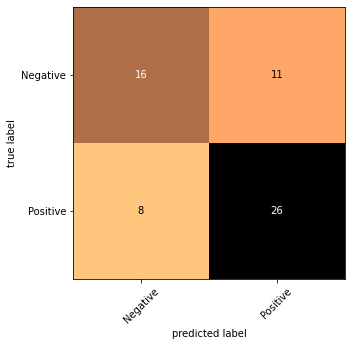

In [40]:
conf_mat=confusion_matrix(Y_test,Y_pred_kclf)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("KNNcrr.png")

Y_pred_kclf = np.around(Y_pred_kclf)
print(metrics.classification_report(Y_test,Y_pred_kclf))

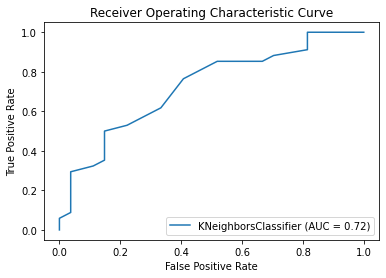

In [42]:
plot_roc_curve(kclf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("KNN.png")

-----------------------
**`-3-  SVM`**
--------------------

In [43]:
svm = SVC(C=8.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.01,
    shrinking=True,
    probability=True,
    tol=0.1,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovo')
svm.fit(X_train,Y_train)
Y_pred_svm = svm.predict(X_test)         
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
score_svm

70.49

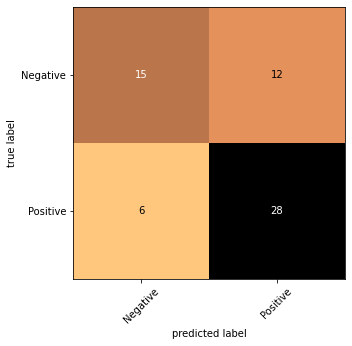

In [44]:
conf_mat=confusion_matrix(Y_test,Y_pred_svm)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("SVCcrr.png")

In [45]:
Y_pred_svm = np.around(Y_pred_svm)
print(metrics.classification_report(Y_test,Y_pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        27
           1       0.70      0.82      0.76        34

    accuracy                           0.70        61
   macro avg       0.71      0.69      0.69        61
weighted avg       0.71      0.70      0.70        61



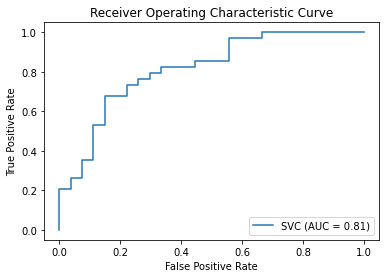

In [46]:
plot_roc_curve(svm,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("SVC.png")

-----------------------
**`-4-  Navie Bayes`**
--------------------

In [47]:
gnb = GaussianNB( var_smoothing=1e-50)
gnb.fit(X_train,Y_train)
gnb.predict(X_test)
Y_pred_gnb = gnb.predict(X_test)          
score_gnb = round(accuracy_score(Y_pred_gnb,Y_test)*100,2)
score_gnb

85.25

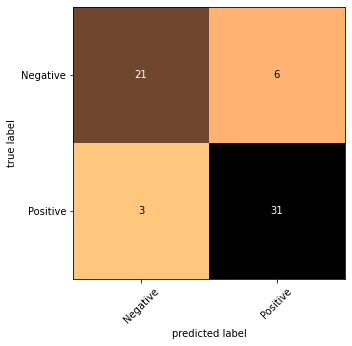

In [48]:
conf_mat=confusion_matrix(Y_test,Y_pred_gnb)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("GNBcrr.png")

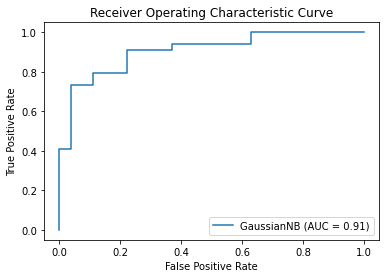

In [49]:
plot_roc_curve(gnb,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("GNB.png")

In [50]:
Y_pred_gnb = np.around(Y_pred_gnb)
print(metrics.classification_report(Y_test,Y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



-----------------------
**`-5- RandomForestClassifier with GridSearch`**
--------------------

In [51]:
param_grid ={
    'max_depth': [10, 20, 30, 40,50,60,70],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [20, 40,60,80 ]
}


In [52]:
RFclf = RandomForestClassifier(max_depth=10, n_estimators=20)
grid = GridSearchCV(estimator=RFclf, param_grid=param_grid, cv = 4, n_jobs=2,verbose=2)
grid_result = grid.fit(X_train, Y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 4 folds for each of 56 candidates, totalling 224 fits
Best: 0.839003 using {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 40}


In [53]:
model=grid_result.best_estimator_
model

RandomForestClassifier(max_depth=50, n_estimators=40)

In [54]:
Y_pred_RFclf=model.predict(X_test)
score_RFclf = round(accuracy_score(Y_pred_RFclf,Y_test)*100,2)
score_RFclf

85.25

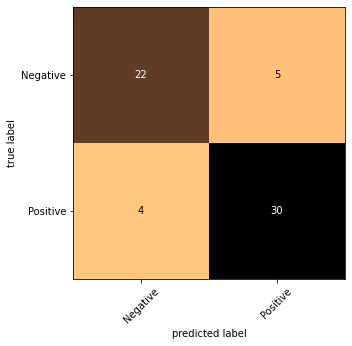

In [55]:
conf_mat=confusion_matrix(Y_test,Y_pred_RFclf)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("RF_GridSearch_crr.png")

In [56]:
Y_pred_RFclf = np.around(Y_pred_RFclf)
print(metrics.classification_report(Y_test,Y_pred_RFclf))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



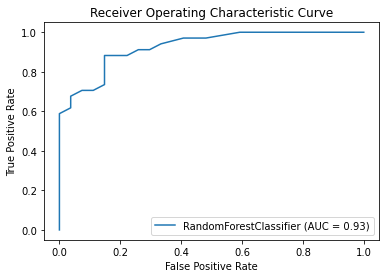

In [57]:
plot_roc_curve(model,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("RF_GridSearch.png")

-----------------------
**`-6- RandomForestClassifier`**
--------------------

In [58]:
max_accuracy = 0


for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)



90.16
323


In [59]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape


(61,)

In [60]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

90.16

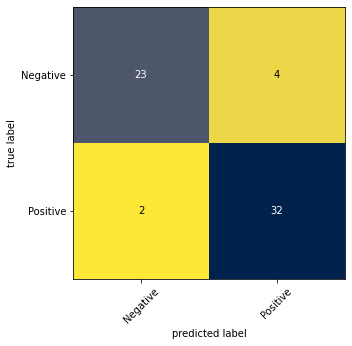

In [61]:
conf_mat=confusion_matrix(Y_test,Y_pred_rf)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='cividis_r'); #fn
plt.savefig("RFcrr.png")

In [62]:
Y_pred_rf = np.around(Y_pred_rf)
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



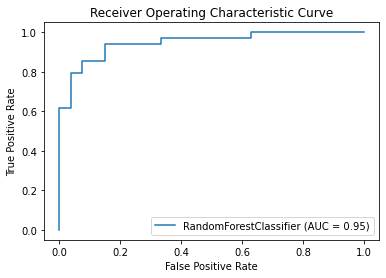

In [63]:
plot_roc_curve(rf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("RF.png")

-----------------------
**`-7- XGBoost `**
--------------------

In [64]:
xgb= XGBClassifier(loss='exponential', learning_rate=0.001, n_estimators=800, subsample=1.0, criterion='friedman_mse', 
                                  min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.2, max_depth=20, min_impurity_decrease=0.1, 
                                  min_impurity_split=None, 
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False, 
                                  presort='deprecated', 
                                  validation_fraction=0.2, n_iter_no_change=None, tol=0.0002)
                              
xgb.fit(X_train, Y_train)
Y_pred_xgb=xgb.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
score_xgb

[06:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf", "presort", "tol", "validation_fraction", "verbose", "warm_start" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


81.97

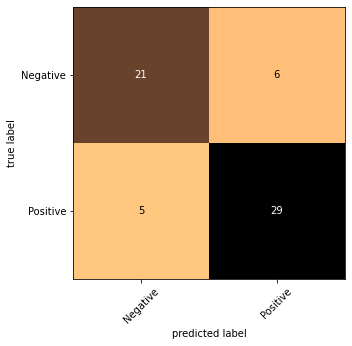

In [65]:
conf_mat=confusion_matrix(Y_test,Y_pred_xgb)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn
plt.savefig("GNBcrr.png")

In [66]:
Y_pred_gnb = np.around(Y_pred_gnb)
print(metrics.classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



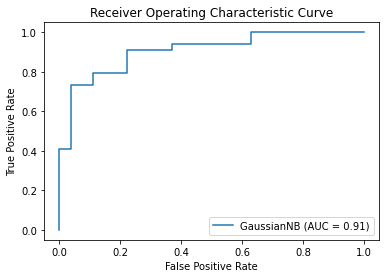

In [67]:
plot_roc_curve(gnb,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("GNB.png")

-----------------------
**`-8- Decision Tree Classifier `**
--------------------

In [68]:
tclf = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.00001,
    max_features='auto',
    random_state=46)
tclf.fit(X_train, Y_train)
Y_pred_tclf=tclf.predict(X_test)
score_tclf = round(accuracy_score(Y_pred_tclf,Y_test)*100,2)
score_tclf

83.61

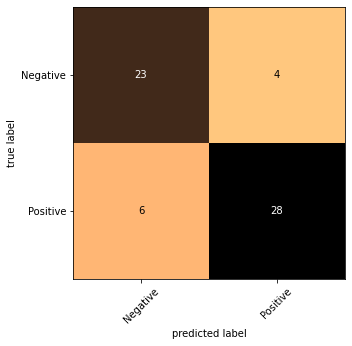

In [69]:
conf_mat=confusion_matrix(Y_test,Y_pred_tclf)
plot_confusion_matrix(conf_mat,class_names=["Negative","Positive"],figsize=(12,5),cmap='copper_r'); #fn

In [70]:
Y_pred_tclf = np.around(Y_pred_tclf)
print(metrics.classification_report(Y_test,Y_pred_tclf))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



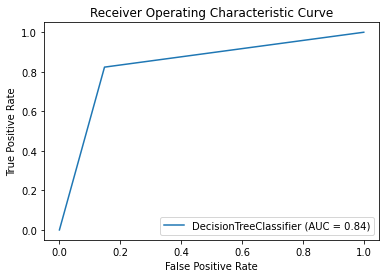

In [71]:
plot_roc_curve(tclf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

-----------------------
**`-8- Showing Final Scores`**
--------------------

In [72]:
scores = [score_lr,score_kclf,score_svm,score_gnb,score_RFclf,score_rf,score_xgb,score_tclf]
Models = ["Logistic Regression","KNN CLF","Support Vector Machine","Gaussian Navie Bayes","Random Forest with GridSearch","Random Forest","XGBoost","Decision Tree"]    

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using KNN CLF is: 68.85 %
The accuracy score achieved using Support Vector Machine is: 70.49 %
The accuracy score achieved using Gaussian Navie Bayes is: 85.25 %
The accuracy score achieved using Random Forest with GridSearch is: 85.25 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 81.97 %
The accuracy score achieved using Decision Tree is: 83.61 %


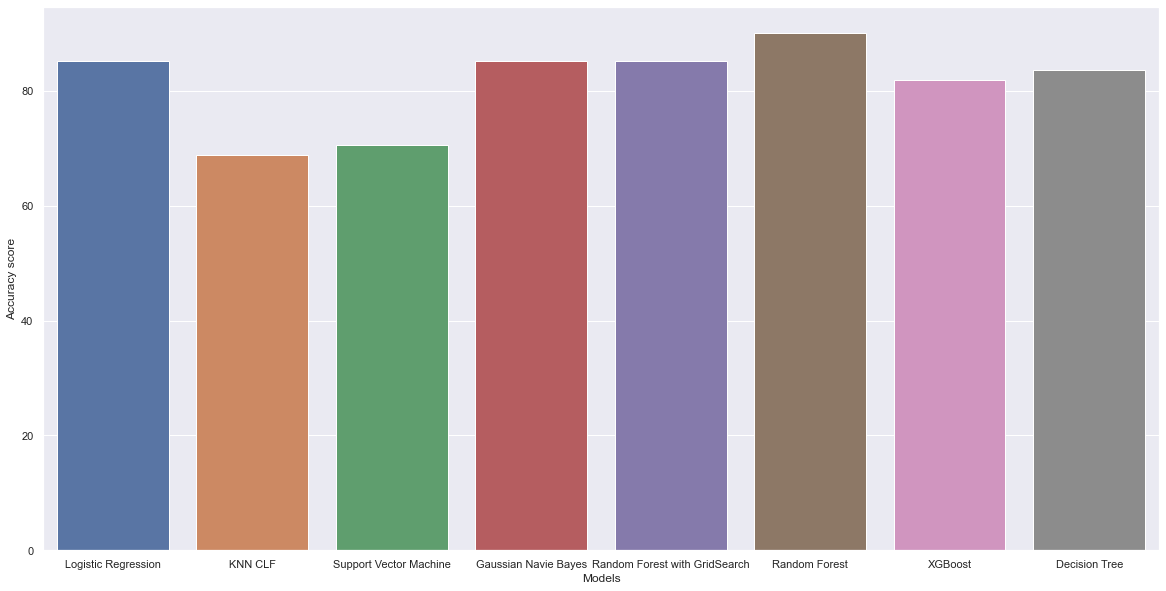

In [78]:
sns.set(style="darkgrid",rc={'figure.figsize':(20,10)})
plt.xlabel("Models",loc='center')
plt.ylabel("Accuracy score")

sns.barplot(Models,scores)
plt.savefig("AccuracyScores.png")

-----------------------
**`Though The Random forest Classifier gets the best result, We will use it as our main model to connect it's API with the GUI `**
--------------------

In [79]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
Input = (63, 1, 3,145,233,1,0,150, 0, 2.3,0,0,1)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = rf.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print("The Person will has a Heart Disease by %f "%(prediction))


[1]
The Person will has a Heart Disease by 1.000000 
